In [1]:
import pandas as pd

input_path = '../Data/Intermediate_Files/'
clinical_data_path = '../Data/Raw_Data/Clinical_Data/'
output_path = '../Data/Processed_Data/'


df_methyl = pd.read_pickle(
    input_path+'df_batch_uncorrected.pkl').sort_index()

print(
    f' Dataset (df) contains {df_methyl.shape[1]} columns (5mC nucleotides/probes) and {df_methyl.shape[0]} rows (samples).')

# Import functions to clean up clinical data
from FM_Functions.Clinical_Data_CleanUp import *

# Call functions to merge, index and clean clinical data files
labels_0531         = clean_cog       (merge_index_0531())
labels_1031         = clean_cog       (merge_index_1031())
labels_aml05        = clean_aml05     (merge_index_aml05())
labels_beataml      = clean_beataml   (merge_index_beataml())
labels_amltcga      = clean_amltcga   (merge_index_amltcga())
labels_nordic_all   = clean_nordic_all(merge_index_nordic_all())
labels_mds_taml     = clean_mds_taml  (merge_index_mds_taml())
labels_all_graal    = clean_all_graal (merge_index_all_graal())
labels_target_all   = clean_target_all(merge_index_target_all())

# Combine all clinical data labels into one dataframe
labels_combined = pd.concat([labels_aml05, labels_beataml,
                         labels_0531, labels_amltcga, labels_1031,
                        labels_nordic_all, labels_mds_taml,
                        labels_all_graal,labels_target_all], axis=0, join='outer')

# read x_top from output file
x = pd.read_pickle(output_path+'ewas_dmr/ewas_top_x.pkl')

# Remove samples that are not in the methyl dataset
df_labels = labels_combined.loc[labels_combined.index.isin(x.index)].sort_index()

 Dataset (df) contains 333352 columns (5mC nucleotides/probes) and 3330 rows (samples).


In [2]:
# Import functions to clean up clinical data
from FM_Functions.Cox_Lasso_Function import *

## Perform Survival Analysis

In [3]:
raw_coefs = train_coxph_lasso(df=df_labels,
                                event= 'os.evnt',
                                time= 'os.time',
                                train_x=x.iloc[:,:100],
                                cv_n_split=3,
                                loops=10)

raw_coefs.to_csv(output_path + 'multivariate_cox_lasso/ewas_cog_os_raw_coefs.csv')

Running Cox-Lasso through 10 loops:


  0%|          | 0/10 [00:00<?, ?it/s]/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
 10%|█         | 1/10 [00:01<00:15,  1.78s/it]/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_st

Cox-Lasso Trained Successfuly!
Selected alpha value: [0.021377780404390822]


In [4]:
raw_coefs

,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,nonzero_count,nonzero_freq
IlmnID,,,,,,,,,,,,
cg01543603,0.101331,0.088851,0.086266,0.091520,0.109460,0.089169,0.087532,0.086266,0.085848,0.087532,10,1.0
cg25292309,-0.058593,-0.051546,-0.051902,-0.050783,-0.060176,-0.054036,-0.051847,-0.051902,-0.052392,-0.051847,10,1.0
cg20310759,-0.081225,-0.044011,-0.048395,-0.039300,-0.088123,-0.065055,-0.046083,-0.048395,-0.056152,-0.046083,10,1.0
cg10089193,0.100569,0.074000,0.079050,0.067875,0.105827,0.090012,0.076657,0.079050,0.085329,0.076657,10,1.0
cg08900363,-0.145072,-0.130750,-0.136417,-0.123897,-0.145841,-0.143864,-0.133704,-0.136417,-0.141368,-0.133704,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
cg20429981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
cg12649208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0
cg14037250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0


In [5]:
raw_coefs = pd.read_csv(output_path + 'multivariate_cox_lasso/ewas_cog_os_raw_coefs.csv', index_col=0)

### Set Threshold

In [6]:
mean_coefs = set_cutoff(coefs=raw_coefs,threshold=0.85)
mean_coefs                                

IlmnID
cg20219911    0.193547
cg17099306    0.105642
cg01543603    0.091378
cg10089193    0.083503
cg02678414    0.079688
cg05131266    0.077085
cg00192882    0.059155
cg08329113    0.027522
cg18072388    0.017603
cg07660635   -0.020918
cg25292309   -0.053502
cg20310759   -0.056282
cg06748884   -0.066351
cg04839706   -0.090482
cg14928764   -0.112784
cg08900363   -0.137103
dtype: float64

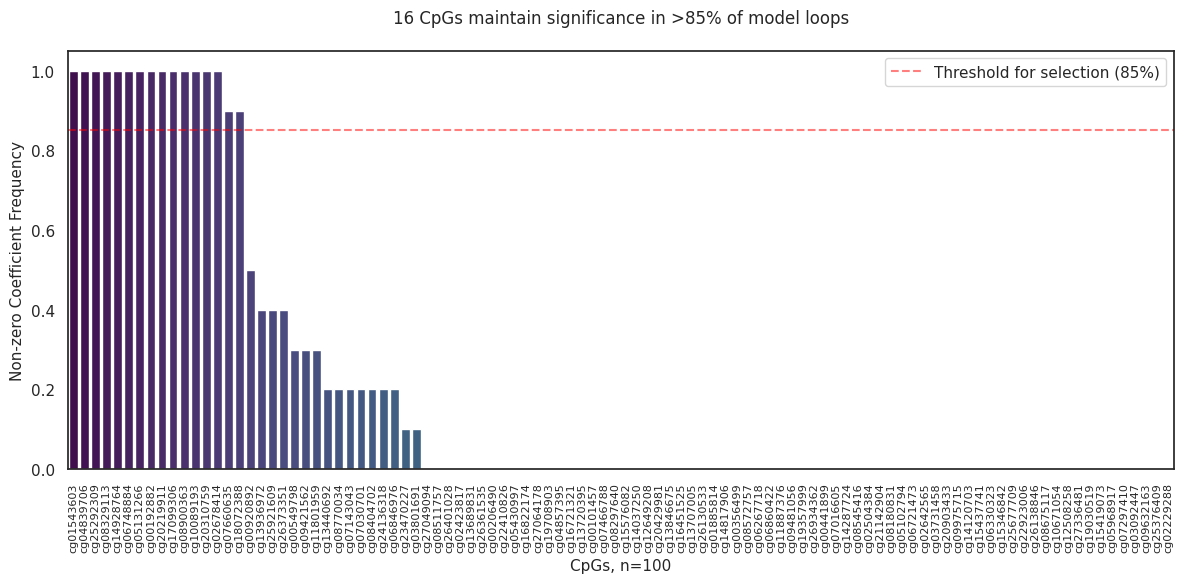

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_nonzero_coef_freq(raw_coefs, mean_coefs, threshold=0.85, savefig=False, fig_path=None):
    sns.set_theme(style='white')

    # Larger figure size
    fig, ax = plt.subplots(figsize=(12,6))

    # Sorting the raw_coefs DataFrame by 'nonzero_freq'
    raw_coefs = raw_coefs.sort_values('nonzero_freq', ascending=False)

    # Plotting with a more pleasing color palette
    sns.barplot(x=raw_coefs.index, y=raw_coefs['nonzero_freq'], palette='viridis', ax=ax)

    # Adding y line
    plt.axhline(threshold, linestyle="--", color="red", label=f"Threshold for selection ({int(threshold*100)}%)",
                alpha=0.5)

    # Adding labels and title
    ax.set_xlabel("CpGs, n=" + str(len(raw_coefs)), fontsize=11)
    ax.set_ylabel("Non-zero Coefficient Frequency", fontsize=11)

    plt.title(f'{len(mean_coefs)} CpGs maintain significance in >{int(threshold*100)}% of model loops',
              pad=20)

    # Rotating x-axis labels for better readability if labels are overlapping
    plt.xticks(rotation=90, fontsize=8)

    # Legend
    plt.legend()

    # Tight layout
    plt.tight_layout()

    # Saving the figure
    if savefig and fig_path:
        plt.savefig(fig_path, bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()

plot_nonzero_coef_freq(raw_coefs, mean_coefs, savefig=False, fig_path=None)


## Generate Model Results

### Discovery Dataset

In [17]:
score_name = 'MethylScore_CoxPH'

In [11]:
df, methylscore_cutoff = generate_coxph_score(coef_mean=mean_coefs,
                                        x=x.iloc[:,:100],
                                        df=df_labels,
                                        score_name=score_name,
                                        train_test="train",
                                        cutoff_train=0.75)

Continuous score cut at the value of 0.4776


In [32]:
# Import Plotting Functions
from FM_Functions.Data_Visualization import *

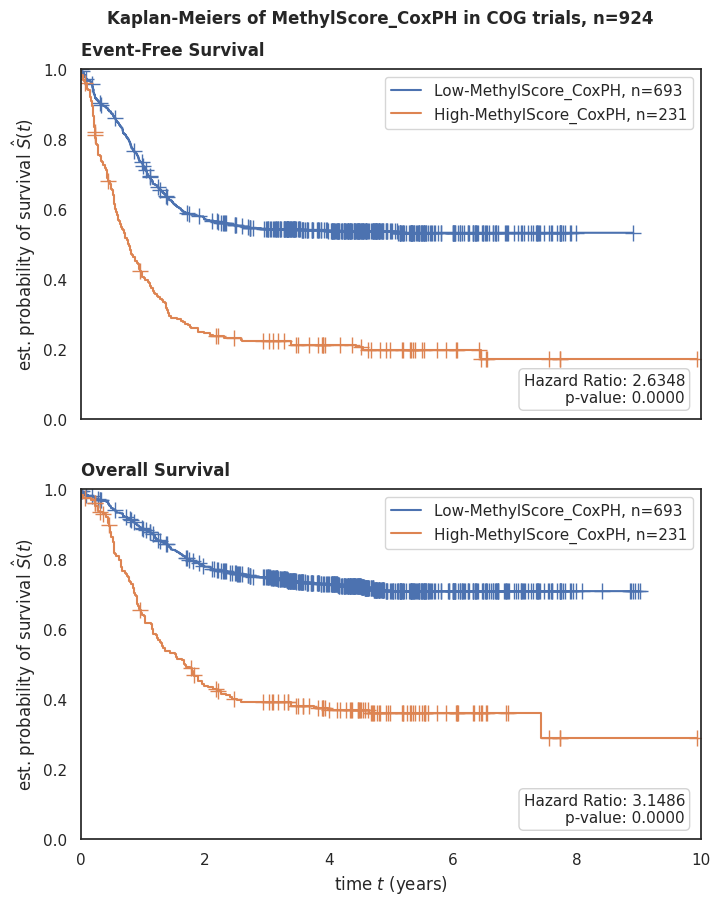

In [19]:
draw_kaplan_meier(scorename=score_name,
                        df=df,
                        save_plot=False,
                        add_risk_counts=False,
                        trialname='COG trials')

## Forest Plots

In [39]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df,
                    trialname='COG trials',
                    scorename=score_name,
                    save_plot=False)

LinAlgError: Singular matrix

In [22]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df,
                    trialname='COG trials',
                    scorename=score_name,
                    save_plot=False)


LinAlgError: Singular matrix